# Homework 4

by: Nick Rüdlinger

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Question 1: Exploratory Data Analysis

### Load the File

In [2]:
import pandas as pd
import zipfile

zf = zipfile.ZipFile("example/input/compustat.zip")
data = pd.read_csv(zf.open("compustat.csv"))

In [3]:
data.tail()

,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,cusip,curcdq,datacqtr,datafqtr,cshoq,saleq,costat,prccq,sic
1811294,335466,20190331,2019,1,INDL,C,D,STD,G4511M108,USD,2019Q1,2019Q1,NaN,4.560,A,NaN,NaN
1811295,335466,20190630,2019,2,INDL,C,D,STD,G4511M108,USD,2019Q2,2019Q2,20.162,12.713,A,2.7500,NaN
1811296,335466,20190930,2019,3,INDL,C,D,STD,G4511M108,USD,2019Q3,2019Q3,22.518,11.750,A,1.1500,NaN
1811297,335466,20191231,2019,4,INDL,C,D,STD,G4511M108,USD,2019Q4,2019Q4,25.662,12.790,A,1.0173,NaN
1811298,335466,20200331,2020,1,INDL,C,D,STD,G4511M108,USD,2020Q1,2020Q1,31.330,10.873,A,0.6400,NaN


In [4]:
# add the market cap as the product of #shares (cshoq) and the closing price (prccq)
data["mcap"] = data["cshoq"] * data["prccq"]

In [5]:
# reduce dataset to the columns we actually want
data = data[["sic", "datacqtr", "cusip", "cshoq", "saleq", "prccq", "mcap"]]

In [6]:
data

,sic,datacqtr,cusip,cshoq,saleq,prccq,mcap
0,3089.0,1966Q1,000032102,0.219,NaN,NaN,NaN
1,3089.0,1966Q2,000032102,0.219,NaN,NaN,NaN
2,3089.0,1966Q3,000032102,0.219,NaN,NaN,NaN
3,3089.0,1966Q4,000032102,0.219,4.032,NaN,NaN
4,3089.0,1967Q1,000032102,0.277,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1811294,NaN,2019Q1,G4511M108,NaN,4.560,NaN,NaN
1811295,NaN,2019Q2,G4511M108,20.162,12.713,2.7500,55.445500
1811296,NaN,2019Q3,G4511M108,22.518,11.750,1.1500,25.895700
1811297,NaN,2019Q4,G4511M108,25.662,12.790,1.0173,26.105953


### Aggergate Sales of current quarter and market cap

In [25]:
# aggregate values
stats = data.agg({"saleq" : ["mean", "std", "count", "size"],
                  "mcap" : ["mean", "std", "count", "size"]}).transpose()
# compute more stats
stats["missing_count"] = stats["size"] - stats["count"]
stats["missing_ratio"] = stats["missing_count"]/stats["size"]
# drop columns not needed
stats = stats.drop(columns = ["count", "size"])

stats.applymap(lambda x: "%.4f" % x)

,mean,std,missing_count,missing_ratio
saleq,445.1507,2679.7066,269498.0000,0.1488
mcap,2057.4731,13202.1975,468276.0000,0.2585


### Outliers

In [106]:
data.describe()

,sic,cshoq,saleq,prccq,mcap,ic,tmc,pmc,HHI,HHI_mean
count,1.810931e+06,1.569058e+06,1.541801e+06,1.468061e+06,1.343023e+06,1.810931e+06,1.808216e+06,1.341706e+06,1.808216e+06,1.810931e+06
mean,4.837408e+03,1.463094e+02,4.451507e+02,2.304301e+01,2.057473e+03,4.796737e+01,7.441888e+05,2.723631e+01,8.902966e+02,8.904659e+02
std,2.092611e+03,4.153391e+04,2.679707e+03,5.266772e+02,1.320220e+04,2.086482e+01,1.018853e+06,3.418450e+02,1.167433e+03,8.201161e+02
min,1.000000e+02,0.000000e+00,-2.562300e+04,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.273548e+02
25%,3.312000e+03,4.152000e+00,3.210000e+00,3.000000e+00,2.000701e+01,3.300000e+01,5.367339e+04,4.864006e-05,2.840695e+02,4.257337e+02
50%,4.923000e+03,1.298600e+01,2.182500e+01,1.082000e+01,9.421800e+01,4.900000e+01,3.007414e+05,2.347948e-03,5.200885e+02,6.343174e+02
75%,6.722000e+03,4.236800e+01,1.305300e+02,2.381000e+01,5.257138e+02,6.700000e+01,1.154723e+06,1.201210e-01,9.738908e+02,1.069967e+03
max,9.998000e+03,2.597497e+07,2.073073e+05,1.416000e+05,1.540774e+06,9.900000e+01,7.410130e+06,1.000000e+04,1.000000e+04,8.777100e+03


First, lets get a quick overview of how each column of the data is distributed. Lets focus on sales only. We see that the max is multiple times the standard deviation away from its mean, this could be an outlier. Also the min of the sales is negative. This would make me suspicious, as I would expect sales to be always greater than zero. One should check how sales need to be interpretet here.

Next to further analyse the sales values, one could generate a scatter plot. 

<AxesSubplot:>

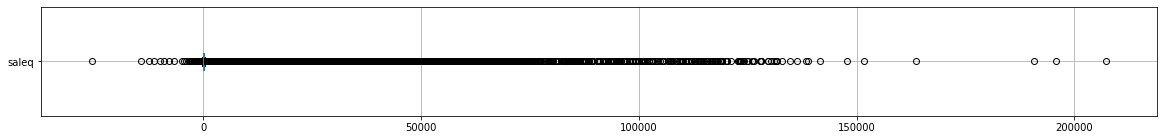

In [24]:
data.boxplot(column = ["saleq"], vert = False, figsize = (20,2))

One can see that there are only 5 observations of quaterly sales, above 150'000. They could be market as outliers. 

Another strategy could be to see check different quantiles (e.g. the 1% and 99% quantile) and then mark the values above and below as outlier. This would probabliy only make sense for companies of comparable size. 

In [136]:
def get_quantile(x, q=0.5):
    return x.quantile(q)

# get quantiles
data_o = data.copy()
data_o["is_outlier"] = 0
data_o["q1"] = data_o.groupby("sic")["saleq"].quantile(0.01)
data_o["q99"] = data_o.groupby("sic")["saleq"].quantile(0.99)

data_o.loc[(data_o.saleq < data_o.q1), "is_outlier"] = 1
data_o.loc[(data_o.saleq > data_o.q99), "is_outlier"] = 1

In [137]:
sum(data_o.is_outlier)

46

## Question 2: Compute Industry Conecentration

In [31]:
# compute the industry code, i.e first two digits of the SIC
data["ic"] = data["sic"]//100

In [70]:
# calculate the total market cap per industry and quarter
data["tmc"] = data.groupby(["ic", "datacqtr"])["mcap"].transform("sum") 
# calucalte the market share squared per industry as a number
data["pmc"] = (100*data["mcap"]/data["tmc"])**2
# calculate the HHI for each industry and quarter
data["HHI"] = data.groupby(["ic", "datacqtr"])["pmc"].transform("sum")
# calc mean HHI per industry
mean_hhi = data.groupby(["ic"])["HHI"].mean().reset_index()

In [74]:
mean_hhi.sort_values("HHI", ascending = False).head(4)

,ic,HHI
66,81.0,8777.099983
69,84.0,7840.095081
70,86.0,7826.086957
2,7.0,7396.819798


So the Industries with codes 66, 69, 70 and 2 are the ones with the highest average Herfindahl-Hirschman Index. 

In [97]:
import matplotlib.pyplot as plt


# the desired industriey
inds = [81, 84, 86, 7]
# aggregate the timeseries data
ts_hhi = data[data.ic.isin(inds)].groupby(["ic", "datacqtr"])["HHI"].first().reset_index().pivot(index = "datacqtr", columns = "ic", values = "HHI")

In [98]:
ts_hhi

ic,7.0,81.0,84.0,86.0
datacqtr,,,,
1966Q1,0.000000,NaN,NaN,NaN
1966Q2,0.000000,NaN,NaN,NaN
1966Q3,0.000000,NaN,NaN,NaN
1966Q4,0.000000,NaN,NaN,NaN
1967Q1,0.000000,NaN,NaN,NaN
...,...,...,...,...
2019Q1,5409.078821,10000.000000,NaN,NaN
2019Q2,5827.273173,9704.936241,NaN,NaN
2019Q3,5612.953816,10000.000000,NaN,NaN


Text(0.5, 1.0, 'IC: 7')

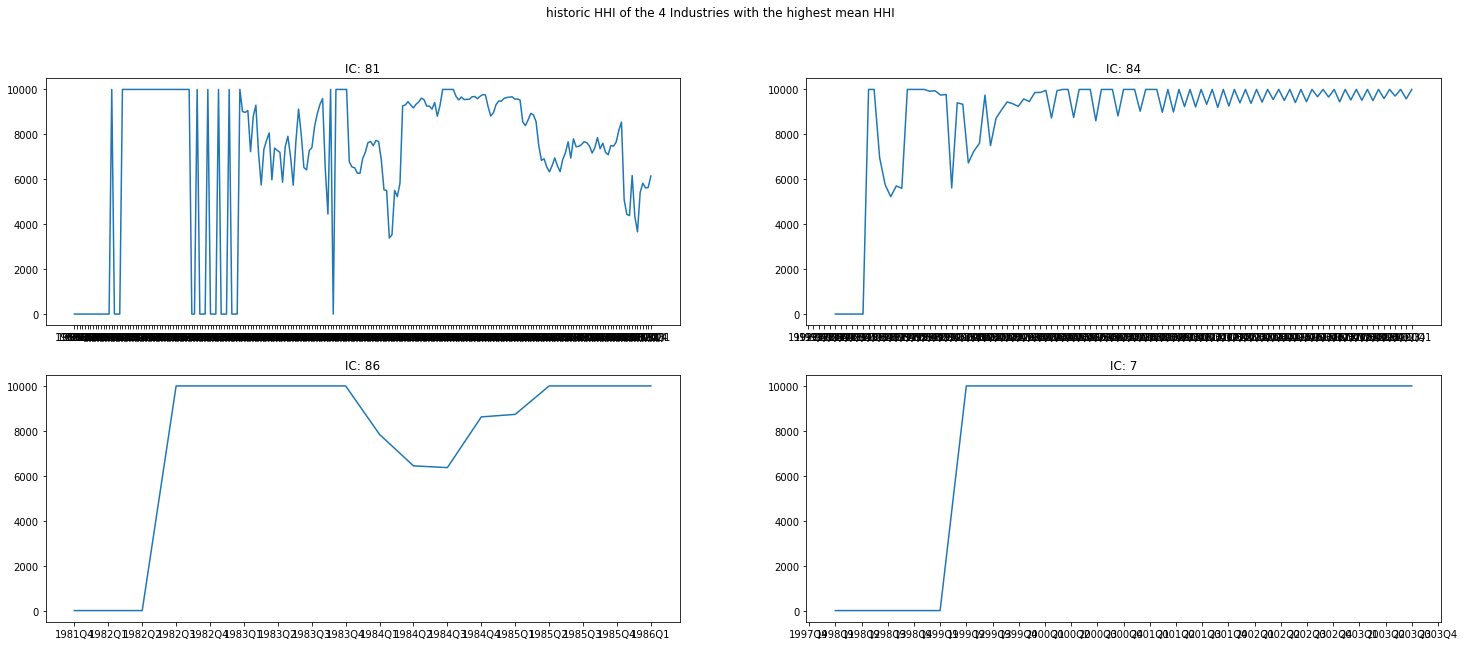

In [103]:
plt.rcParams["figure.figsize"] = (25,10)
fig, axs = plt.subplots(2,2)
fig.suptitle("historic HHI of the 4 Industries with the highest mean HHI")

# plot the ts
axs[0,0].plot(ts_hhi.index, ts_hhi.iloc[:,0])
axs[0,1].plot(ts_hhi.index, ts_hhi.iloc[:,1])
axs[1,0].plot(ts_hhi.index, ts_hhi.iloc[:,2])
axs[1,1].plot(ts_hhi.index, ts_hhi.iloc[:,3])

# set titles
axs[0,0].set_title(label = "IC: " + str(inds[0]))
axs[0,1].set_title(label = "IC: " + str(inds[1]))
axs[1,0].set_title(label = "IC: " + str(inds[2]))
axs[1,1].set_title(label = "IC: " + str(inds[3]))

